# KNN基础

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from collections import Counter

In [19]:
raw_data_X = [[3.39, 2.33],
              [3.11,1.78],
              [1.34, 3.37],
              [3.58, 4.68],
              [2.28, 2.87],
              [7.42, 4.7],
              [5.74, 3.53],
              [9.17, 2.51],
              [7.79, 3.42],
              [7.94, 0.79]
             ]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [3]:
x_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

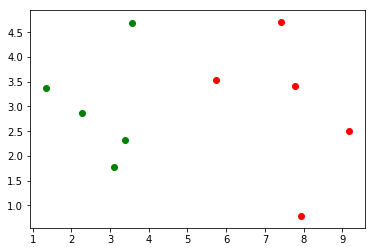

In [4]:
plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1], color="green")
plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1], color="red")
plt.show()

In [5]:
x = np.array([8.10, 3.37])

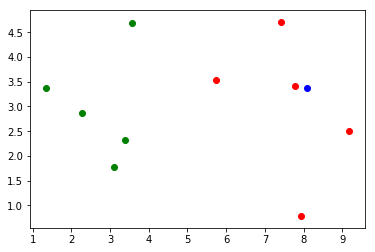

In [6]:
plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1], color="green")
plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1], color="red")
plt.scatter(x[0], x[1], color="blue")
plt.show()

计算过程

In [7]:
distance = [sqrt(np.sum((item -x)**2)) for item in x_train]
nearest = np.argsort(distance)
k=6
topk_y = y_train[nearest[:k]]
votes = Counter(topk_y)
predict_y = votes.most_common(1)[0][0]
predict_y

1

## 使用scikit-learn中的kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)
kNN_classifier.fit(x_train, y_train)
kNN_classifier.predict(x.reshape(1,-1))

array([1])

## 训练数据集、测试数据集分离

In [10]:
from sklearn import datasets

In [11]:
iris = datasets.load_iris()

In [12]:
X = iris.data
y = iris.target

In [13]:
shuffle_indexes = np.random.permutation(X.shape[0])
test_ratio = 0.2
test_num = int(test_ratio * X.shape[0])
test_index = shuffle_indexes[:test_num]
train_index = shuffle_indexes[test_num:]

test_X = X[test_index]
test_y = y[test_index]

train_X = X[train_index]
train_y = y[train_index]

In [14]:
iris_knn_classifier = KNeighborsClassifier(n_neighbors=10)
iris_knn_classifier.fit(train_X, train_y)
result = iris_knn_classifier.predict(test_X)
sum(test_y == result)

27

## sklearn中的train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.3)